In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Multiple.csv")
df["EducationLevel"] = df["EducationLevel"].map({"碩士以上":2,"大學":1,"高中以下":0})

In [260]:
from sklearn.preprocessing import OneHotEncoder
x = df[["City"]]
Encoder = OneHotEncoder().fit(x)
Encoder = Encoder.transform(x).toarray()
df[["CiytA","CityB","CityC"]] = Encoder
df = df.drop(["City","CityC"],axis=1)
df

,YearsExperience,EducationLevel,Salary,CiytA,CityB
0,3.0,1,45.9,1.0,0.0
1,7.8,2,80.5,0.0,0.0
2,2.3,0,25.2,1.0,0.0
3,5.1,0,30.4,1.0,0.0
4,10.0,2,65.7,0.0,1.0
5,1.2,2,60.8,0.0,0.0
6,8.6,1,50.1,0.0,0.0
7,6.9,2,70.3,1.0,0.0
8,4.2,1,40.7,1.0,0.0
9,2.4,0,28.1,1.0,0.0


In [261]:
from sklearn.model_selection import train_test_split
x = df[["YearsExperience","EducationLevel","CiytA","CityB"]]
y = df["Salary"]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=87)
x_train.to_numpy()
y_train.to_numpy()

array([28.1, 45.9, 31.6, 45.2, 50.1, 55.6, 70.9])

為了讓模型快速收斂，用特徵縮放，讓所有數值標準化，高斯分佈

In [262]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [263]:
def compute_cost(y,w,x,b):
    y_pred = (w*x).sum(axis=1)+b
    cost = ((y-y_pred)**2).mean()
    return cost

In [264]:
w = np.array([1,2,3,4])
b = 0
compute_cost(y_train,w,x_train,b)

np.float64(2300.90181819094)

In [265]:
def compute_gradient(w,x,y,b):
    y_pred = (w*x).sum(axis=1)+b
    w_gradient = np.zeros(x.shape[1])
    b_gradient = (y_pred-y).mean()

    for  i in range(x.shape[1]):
        w_gradient[i] = (x[:,i]*(y_pred-y)).mean()
    return w_gradient,b_gradient

In [266]:
w = np.array([1, 2, 2, 4])
b = 1
compute_gradient(w,x_train,y_train,b)

(array([-7.98875789, -8.7391339 ,  8.2510089 , -4.58110394]),
 np.float64(-45.77142857142858))

In [267]:
def gradient_gescient(w_init,b_init,learning_rate):
    w = w_init
    b = b_init
    w_hist = [ ]
    b_hist = [ ]
    c_hist = [ ]

    for i in range(10000):
        w_gradient,b_gradient = compute_gradient(w,x_train,y_train,b)
        w = w-w_gradient*learning_rate
        b = b-b_gradient*learning_rate
        cost = compute_cost(y_train,w,x_train,b)
        if (i%1000 == 0):
            print(f"Interation {i} Cost {cost:.2e}")
        w_hist.append(w)
        b_hist.append(b)
        c_hist.append(cost)

    return w,b,w_hist,b_hist,c_hist

In [268]:
w_init = np.array([0,1,2,3])
b_init = 0
learning_rate = 1.0e-3
w_fianl , b_final , w_hist,b_hist,c_hist = gradient_gescient(w_init,b_init,learning_rate)

Interation 0 Cost 2.33e+03
Interation 1000 Cost 3.11e+02
Interation 2000 Cost 5.26e+01
Interation 3000 Cost 1.65e+01
Interation 4000 Cost 1.07e+01
Interation 5000 Cost 9.36e+00
Interation 6000 Cost 8.76e+00
Interation 7000 Cost 8.39e+00
Interation 8000 Cost 8.13e+00
Interation 9000 Cost 7.94e+00


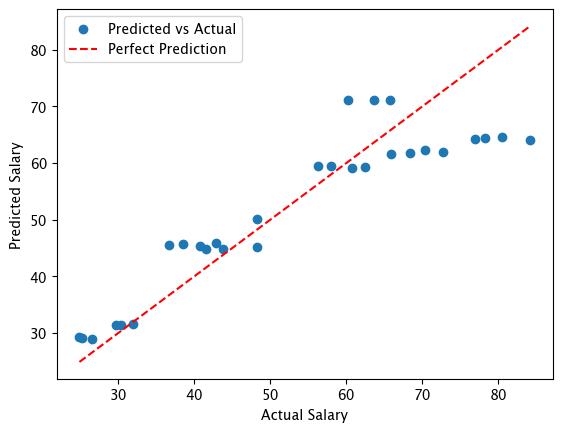

In [272]:
y_pred = (w_fianl * x_test).sum(axis=1) + b_final
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.show()